<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/FuzzyLogic_EX3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#EX3: Mobile Robot

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=164b40765c0a57ed6080e5fa145f11078a3778fcea67d4fda47b6f2138d83857
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


35.0


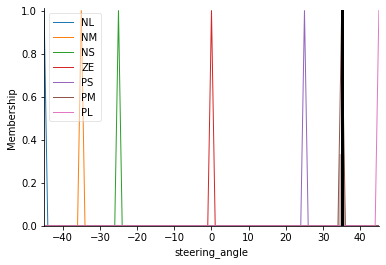

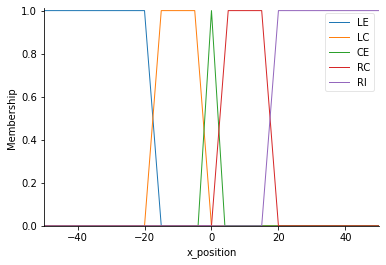

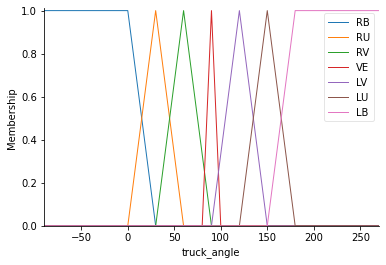

In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

x_position = ctrl.Antecedent(np.arange(-50,51,1),'x_position')
truck_angle = ctrl.Antecedent(np.arange(-90,271,1),'truck_angle')
steering_angle = ctrl.Consequent(np.arange(-45,46,1),'steering_angle')

x_position['LE'] = fuzz.trapmf(x_position.universe,[-50,-50,-20,-15])
x_position['LC'] = fuzz.trapmf(x_position.universe,[-20,-15,-5,0])
x_position['CE'] = fuzz.trimf(x_position.universe,[-4,0,4])
x_position['RC'] = fuzz.trapmf(x_position.universe,[0,5,15,20])
x_position['RI'] = fuzz.trapmf(x_position.universe,[15,20,50,50])

truck_angle['RB'] = fuzz.trapmf(truck_angle.universe,[-90,-90,0,30])
truck_angle['RU'] = fuzz.trimf(truck_angle.universe,[0,30,60])
truck_angle['RV'] = fuzz.trimf(truck_angle.universe,[30,60,90])
truck_angle['VE'] = fuzz.trimf(truck_angle.universe,[80,90,100])
truck_angle['LV'] = fuzz.trimf(truck_angle.universe,[90,120,150])
truck_angle['LU'] = fuzz.trimf(truck_angle.universe,[120,150,180])
truck_angle['LB'] = fuzz.trapmf(truck_angle.universe,[150,180,270,270])

steering_angle['NL'] = fuzz.trimf(steering_angle.universe,[-45,-45,-45])
steering_angle['NM'] = fuzz.trimf(steering_angle.universe,[-35,-35,-35])
steering_angle['NS'] = fuzz.trimf(steering_angle.universe,[-25,-25,-25])
steering_angle['ZE'] = fuzz.trimf(steering_angle.universe,[0,0,0])
steering_angle['PS'] = fuzz.trimf(steering_angle.universe,[25,25,25])
steering_angle['PM'] = fuzz.trimf(steering_angle.universe,[35,35,35])
steering_angle['PL'] = fuzz.trimf(steering_angle.universe,[45,45,45])

rule1 = ctrl.Rule(x_position['LE'] & truck_angle['RB'], steering_angle['NL'])
rule2 = ctrl.Rule(x_position['LE'] & truck_angle['RU'], steering_angle['NL'])
rule3 = ctrl.Rule(x_position['LE'] & truck_angle['RV'], steering_angle['NL'])
rule4 = ctrl.Rule(x_position['LE'] & truck_angle['VE'], steering_angle['NM'])
rule5 = ctrl.Rule(x_position['LE'] & truck_angle['LV'], steering_angle['NM'])
rule6 = ctrl.Rule(x_position['LE'] & truck_angle['LU'], steering_angle['NS'])
rule7 = ctrl.Rule(x_position['LE'] & truck_angle['LB'], steering_angle['PS'])

rule8 = ctrl.Rule(x_position['LC'] & truck_angle['RB'], steering_angle['NL'])
rule9 = ctrl.Rule(x_position['LC'] & truck_angle['RU'], steering_angle['NL'])
rule10 = ctrl.Rule(x_position['LC'] & truck_angle['RV'], steering_angle['NM'])
rule11 = ctrl.Rule(x_position['LC'] & truck_angle['VE'], steering_angle['NM'])
rule12 = ctrl.Rule(x_position['LC'] & truck_angle['LV'], steering_angle['NS'])
rule13 = ctrl.Rule(x_position['LC'] & truck_angle['LU'], steering_angle['PS'])
rule14 = ctrl.Rule(x_position['LC'] & truck_angle['LB'], steering_angle['PM'])

rule15 = ctrl.Rule(x_position['CE'] & truck_angle['RB'], steering_angle['NM'])
rule16 = ctrl.Rule(x_position['CE'] & truck_angle['RU'], steering_angle['NM'])
rule17 = ctrl.Rule(x_position['CE'] & truck_angle['RV'], steering_angle['NS'])
rule18 = ctrl.Rule(x_position['CE'] & truck_angle['VE'], steering_angle['ZE'])
rule19 = ctrl.Rule(x_position['CE'] & truck_angle['LV'], steering_angle['PS'])
rule20 = ctrl.Rule(x_position['CE'] & truck_angle['LU'], steering_angle['PM'])
rule21 = ctrl.Rule(x_position['CE'] & truck_angle['LB'], steering_angle['PM'])

rule22 = ctrl.Rule(x_position['RC'] & truck_angle['RB'], steering_angle['NM'])
rule23 = ctrl.Rule(x_position['RC'] & truck_angle['RU'], steering_angle['NS'])
rule24 = ctrl.Rule(x_position['RC'] & truck_angle['RV'], steering_angle['PS'])
rule25 = ctrl.Rule(x_position['RC'] & truck_angle['VE'], steering_angle['PM'])
rule26 = ctrl.Rule(x_position['RC'] & truck_angle['LV'], steering_angle['PM'])
rule27 = ctrl.Rule(x_position['RC'] & truck_angle['LU'], steering_angle['PL'])
rule28 = ctrl.Rule(x_position['RC'] & truck_angle['LB'], steering_angle['PL'])

rule29 = ctrl.Rule(x_position['RI'] & truck_angle['RB'], steering_angle['NS'])
rule30 = ctrl.Rule(x_position['RI'] & truck_angle['RU'], steering_angle['PS'])
rule31 = ctrl.Rule(x_position['RI'] & truck_angle['RV'], steering_angle['PM'])
rule32 = ctrl.Rule(x_position['RI'] & truck_angle['VE'], steering_angle['PM'])
rule33 = ctrl.Rule(x_position['RI'] & truck_angle['LV'], steering_angle['PL'])
rule34 = ctrl.Rule(x_position['RI'] & truck_angle['LU'], steering_angle['PL'])
rule35 = ctrl.Rule(x_position['RI'] & truck_angle['LB'], steering_angle['PL'])

steeringangle_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35])
steeringangle = ctrl.ControlSystemSimulation(steeringangle_ctrl)
steeringangle.input['x_position'] = 10
steeringangle.input['truck_angle'] = 100
steeringangle.compute()
print(steeringangle.output['steering_angle'])
steering_angle.view(sim=steeringangle)

x_position.view()
truck_angle.view()